In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import numpy.random as alea

In [2]:
def visu_point(matPoint,style):
    # matPoint contient les coordonnées des points 
    x = matPoint[0, :]
    y = matPoint[1, :]
    plt.plot(x, y, style)
    
def visu_segment(P1,P2,style):
    # attention P1 et P2 sont des tableaux (2,1)
    matP = np.concatenate((P1,P2),1)
    visu_point(matP,style)
    
def mat_rotation(theta):
    # si pas besoin des coordonnées homogènes
    mat = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]])
    return mat

In [65]:
def visu_BezierQuad(matPointControl,str):
    n=50
    mt = np.linspace(0,1.,n)  
    matt = np.ones((3,n))  # que des 1
    matt[1,:] = mt  # ligne avec les t
    matt[2,:] = mt*mt  # ligne avec les t*t

    matBezier3 = np.array([[1, 0, 0], 
                           [-2, 2, 0], 
                           [1, -2, 1]])

    matPointligne = np.dot(np.dot(matt.T,matBezier3),matPointControl.T)
    matPoint=matPointligne.T  # on transpose

    visu_point(matPointControl,'r.')
    visu_point(matPointControl,'b:')
    visu_point(matPoint,str)
    
    return matPoint

In [61]:
def visu_BezierCubic(matPointControl,str):
    n=50
    mt = np.linspace(0,1.,n)  
    matt = np.ones((4,n))
    matt[1,:] = mt
    matt[2,:] = mt*mt
    matt[3,:] = mt*mt*mt
    
    matBezier4 = np.array([
            [1, 0, 0, 0],
            [-3, 3, 0, 0],
            [3, -6, 3, 0],
            [-1, 3, -3, 1]
        ])
    
    matPointligne = np.dot(np.dot(matt.T,matBezier4),matPointControl.T)
    matPoint=matPointligne.T  # on transpose

    visu_point(matPointControl,'k.')
    visu_point(matPointControl,'g:')
    visu_point(matPoint,str)

# courbe de Bezier quadratique : un exemple  ***************

In [62]:
matPointControl = np.array([
        [0, 0],
        [2, 1],
        [4, 0]
])

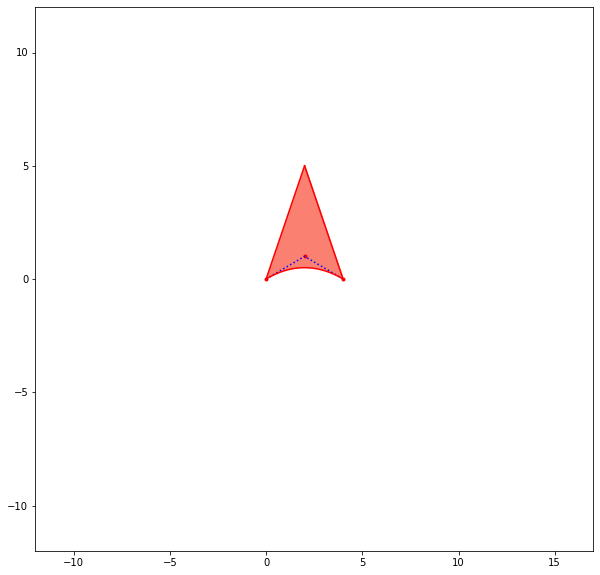

In [71]:
plt.figure(figsize=(10, 10))
plt.xlim(-taille-1, taille+1+5)  
plt.ylim(-taille-1, taille+1)
visu_segment(np.array([[0, 0]]).T, np.array([[2, 5]]).T, "-r")
visu_segment(np.array([[4, 0]]).T, np.array([[2, 5]]).T, "-r")

res = visu_BezierQuad(matPointControl.T, "-r")

plt.fill_between(
    np.array([
        0, 2
    ]),
    np.array([
        0, 5
    ]),
    color="salmon"
)

plt.fill_between(
    np.array([
        4, 2
    ]),
    np.array([
        0, 5
    ]),
    color="salmon"
)

plt.fill_between(
    res[0],
    res[1],
    color="white"
)

In [33]:
plt.show()

# effectuer une rotation de cette courbe : ********************

(-12.0, 12.0)

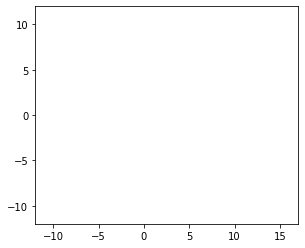

In [9]:
plt.axis('scaled') # la position est importante
taille=11
plt.xlim(-taille-1, taille+1+5)  
plt.ylim(-taille-1, taille+1)

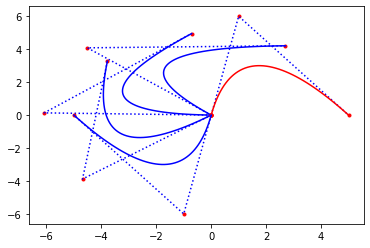

In [10]:
visu_BezierQuad(matPointControl.T, "-r")
for i in np.linspace(1, np.pi, 4):
    visu_BezierQuad(np.dot(mat_rotation(i), matPointControl.T), "-b")

In [11]:
plt.show()

# courbe de Bezier cubique : un exemple  ***************

$$P(t) = (1−t)3P0+ 3t(1−t)2P1+ 3t2(1−t)P2+t3P3$$

(-12.0, 12.0)

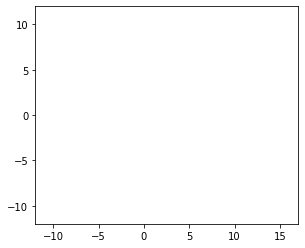

In [12]:
plt.axis('scaled') # la position est importante
taille=11
plt.xlim(-taille-1, taille+1+5)
plt.ylim(-taille-1, taille+1)

In [13]:
t = 2
mat4P1 = np.array([
    [-10, 10],
    [-10, 5],
    [-5, 10],
    [-5, 5]
    ])

mat4P2 = np.array([
    [6, 2],
    [4, 10],
    [12, 7],
    [3, 4]
    ])

mat4P3 = np.array([
    [2, -3],
    [0, -10],
    [10, 0],
    [10, -5]
    ])

mat4P4 = np.array([
    [10, -5],
    (1 - t) * mat4P3[2] + t * mat4P3[3],
    [3, -8],
    [13, -6]
    ])

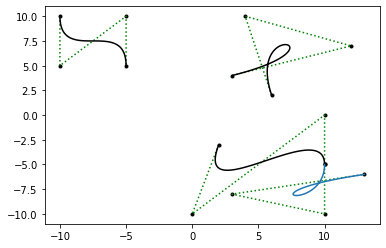

In [17]:
visu_BezierCubic(mat4P1.T, "-k")
visu_BezierCubic(mat4P2.T, "-k")
visu_BezierCubic(mat4P3.T, "-k")
visu_BezierCubic(mat4P4.T, "-")

In [15]:
mat4P1

array([[-10,  10],
       [-10,   5],
       [ -5,  10],
       [ -5,   5]])

In [16]:
plt.show()